<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/MachineLearning_DeepLearning/Study/05_%EA%B8%B0%ED%83%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits, load_wine, load_diabetes, make_blobs, make_moons

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVR, SVC, LinearSVR, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.cluster import KMeans
import xgboost as xgb
# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_metric, plot_tree
import lightgbm as lgb

import multiprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

import graphviz

In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 22.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=750dc5e4b8e1dbcdcaaae39d4d2a1ffbe2abd49ce46ce830cd03fdb0bd675554
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,391 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [ ]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# Naive Bayes

- 선형 모델과 유사(LogisticRegression, LinearSVC, ...)
- 훈련 속도는 빠르지만 일반화 성능이 조금 뒤쳐진다
- 종류
    - GaussianNB
    - BernoulliNB
    - MultinomialNB
- 파라미터
    - alpha

## (1) GaussianNB

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [ ]:
model = GaussianNB().fit(X_train, y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
print("정확도 :", accuracy_score(y_test, preds))

정확도 : 1.0


In [ ]:
confusion_matrix(y_test, preds)

array([[ 8,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 15]])

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## (2) MultinomialNB

- 영화 리뷰를 이용한 평가 예측(부정/긍정)

In [ ]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df


,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [ ]:
##### type특성을 숫자로 매핑

df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [ ]:
df_X = df["movie_review"]
df_y = df["label"]

In [ ]:
cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)
X_traincv

encoded_input = X_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [ ]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [ ]:
##### 총 37개의 단어
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [ ]:
model = MultinomialNB().fit(X_traincv, df_y)

In [ ]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]


In [ ]:
test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_X = test_df["movie_review"]
test_y = test_df["label"]

In [ ]:
X_testcv = cv.transform(test_X)
preds = model.predict(X_testcv)

In [ ]:
accuracy_score(test_y, preds)

1.0

## (3) BernoulliNB
- 스팸 메일

In [ ]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]


In [ ]:
df = pd.DataFrame(email_list)

In [ ]:
df["label"] = df["spam"].map({True:1, False:0})

In [ ]:
df_X = df["email title"]
df_y = df["label"]

In [ ]:
cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)
X_traincv

encoded_input = X_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [ ]:
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [ ]:
##### 총 17개의 단어
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [ ]:
model = BernoulliNB().fit(X_traincv, df_y)

In [ ]:
test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_X = test_df["email title"]
test_y = test_df["label"]

In [ ]:
X_testcv = cv.transform(test_X)
preds = model.predict(X_testcv)

In [ ]:
accuracy_score(test_y, preds)

0.8333333333333334

# 2. K-MEANS

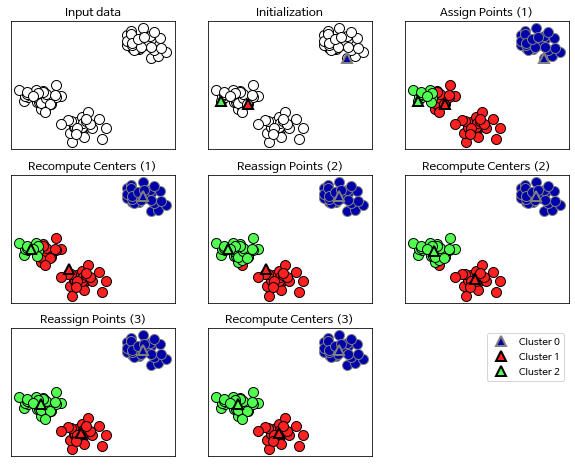

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

## 1) make_blobs 샘플 활용

In [ ]:
X, y = make_blobs()

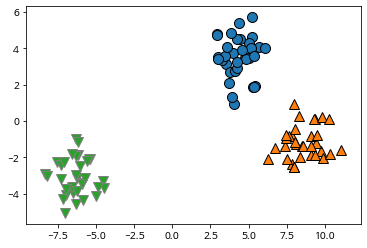

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [ ]:
model = KMeans(n_clusters=3).fit(X)

In [ ]:
model.labels_

array([1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2], dtype=int32)

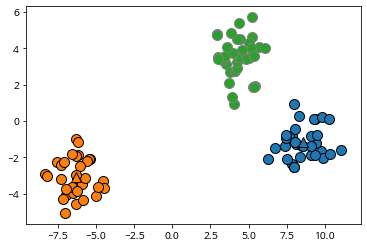

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2], markers="^")

In [ ]:
model = KMeans(n_clusters=2).fit(X)

In [ ]:
model.labels_

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

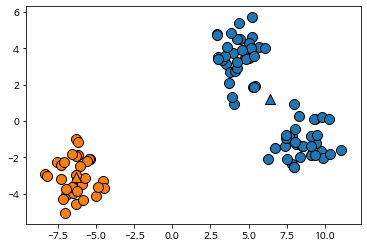

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1], markers="^")

In [ ]:
model = KMeans(n_clusters=5).fit(X)

In [ ]:
model.labels_

array([0, 2, 3, 1, 0, 2, 4, 2, 2, 3, 4, 2, 0, 0, 4, 0, 1, 0, 1, 2, 1, 2,
       4, 0, 0, 2, 3, 0, 3, 0, 2, 1, 3, 0, 0, 2, 4, 0, 3, 0, 1, 0, 2, 0,
       2, 0, 4, 0, 0, 4, 3, 2, 2, 2, 3, 2, 2, 0, 0, 0, 1, 2, 3, 0, 0, 1,
       4, 2, 1, 2, 3, 2, 1, 2, 2, 0, 3, 0, 3, 0, 3, 3, 0, 0, 1, 3, 3, 1,
       0, 1, 0, 0, 1, 1, 0, 2, 4, 1, 3, 2], dtype=int32)

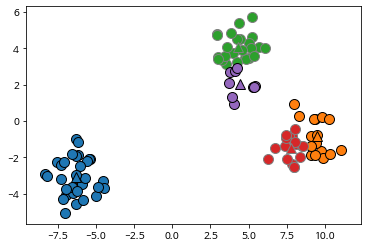

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2, 3, 4], markers="^")

## 2) make_moons 샘플 활용

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

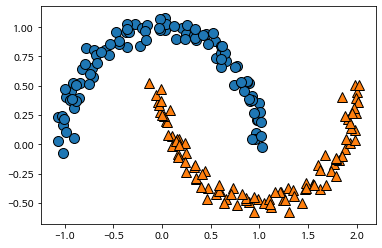

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [ ]:
model = KMeans(n_clusters=2).fit(X)

In [ ]:
model.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1], dtype=int32)

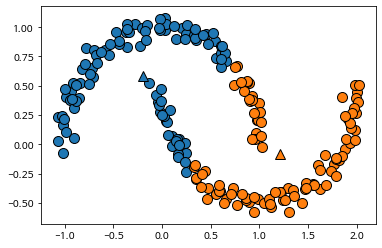

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1], markers="^")

In [ ]:
preds = model.predict(X)

In [ ]:
accuracy_score(y, preds)

0.755

## 3) iris 샘플 활용

In [ ]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃받침')

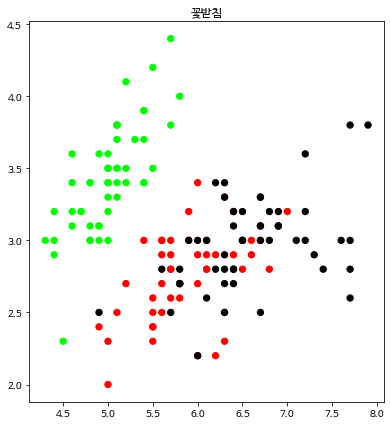

In [ ]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

In [ ]:
model = KMeans(n_clusters=3).fit(X)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

Text(0.5, 1.0, '예측 결과')

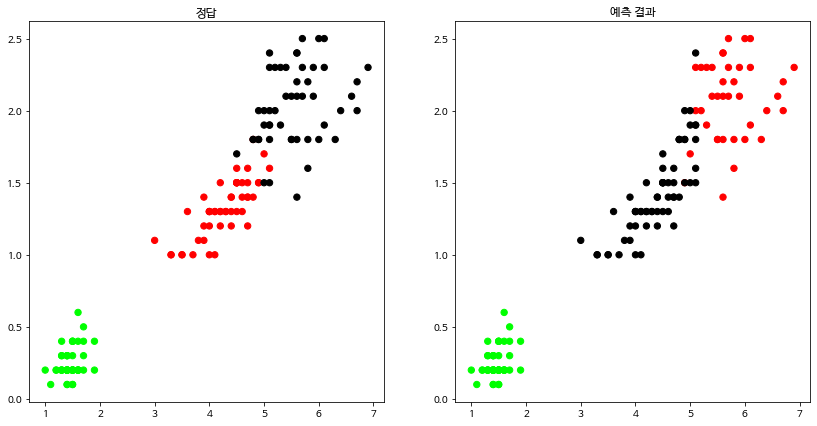

In [ ]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("예측 결과")

In [ ]:
accuracy_score(y, model.labels_)

0.44

In [ ]:
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])

## 4) 사람의 키와 몸무게를 활용

In [ ]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70
